kaggle.json copied to ~/.kaggle and permissions set.


'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# Install Kaggle CLI
!pip install kaggle

# Make sure the .kaggle directory exists
import os
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Move kaggle.json to the .kaggle directory and set permissions
import shutil
shutil.copy("kaggle.json", kaggle_dir)
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

# Download the dataset
!kaggle datasets download -d salader/dogs-vs-cats

# Unzip the downloaded file
import zipfile
with zipfile.ZipFile("dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall(".")


     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.1 kB ? eta -:--:--
     ---------------------------- --------- 61.4/82.1 kB 550.5 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 513.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105134 sha256=33eb1d94ac9944b0d1b66d3a8d1bce4beaa6d3396668a768c825c6ef92b0f0e5
  Stored in directory: c:\users\anant\appdata\local\pip\cache\wheels\ec\d9\04\93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Successfully built kaggle
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown




  0%|          | 0.00/1.06G [00:00<?, ?B/s]
  0%|          | 1.00M/1.06G [00:01<24:55, 764kB/s]
  0%|          | 2.00M/1.06G [00:01<12:38, 1.50MB/s]
  0%|          | 3.00M/1.06G [00:01<07:53, 2.41MB/s]
  0%|          | 4.00M/1.06G [00:01<05:41, 3.33MB/s]
  1%|          | 6.00M/1.06G [00:01<03:17, 5.77MB/s]
  1%|          | 8.00M/1.06G [00:02<02:20, 8.05MB/s]
  1%|          | 10.0M/1.06G [00:02<01:56, 9.75MB/s]
  1%|1         | 12.0M/1.06G [00:02<01:50, 10.2MB/s]
  1%|1         | 14.0M/1.06G [00:02<01:31, 12.3MB/s]
  2%|1         | 17.0M/1.06G [00:02<01:09, 16.2MB/s]
  2%|1         | 20.0M/1.06G [00:02<01:02, 17.8MB/s]
  2%|2         | 22.0M/1.06G [00:02<01:01, 18.2MB/s]
  2%|2         | 24.0M/1.06G [00:03<01:03, 17.5MB/s]
  2%|2         | 26.0M/1.06G [00:03<01:03, 17.7MB/s]
  3%|2         | 28.0M/1.06G [00:03<01:03, 17.4MB/s]
  3%|2         | 30.0M/1.06G [00:03<01:01, 18.1MB/s]
  3%|2         | 32.0M/1.06G [00:03<01:02, 17.6MB/s]
  3%|3         | 34.0M/1.06G [00:03<01:03, 17.6MB/s]
  

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import tensorflow as tf
from tensorflow.keras  import layers , models
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img
from sklearn.metrics import confusion_matrix , classification_report , roc_curve , auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array



In [6]:
list_cats = ['/content/dogs_vs_cats/train/cats/cat.0.jpg' , '/content/dogs_vs_cats/train/cats/cat.1.jpg']
#as we cat list all the directories one by one we use os walk and os.listdir

In [8]:
import os

# List contents of the dataset directory
dataset_dir = os.path.join(os.getcwd(), 'dogs_vs_cats')
train_dir = os.path.join(dataset_dir, 'train', 'dogs')

if os.path.exists(train_dir):
    print("Directory exists:", train_dir)
    print("Contents:", os.listdir(train_dir))
else:
    print("Directory does not exist:", train_dir)


Directory exists: C:\Users\anant\deep learning\Untitled Folder\dogs_vs_cats\train\dogs
Contents: ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg', 'dog.10005.jpg', 'dog.10007.jpg', 'dog.10008.jpg', 'dog.10009.jpg', 'dog.1001.jpg', 'dog.10011.jpg', 'dog.10012.jpg', 'dog.10013.jpg', 'dog.10015.jpg', 'dog.10016.jpg', 'dog.10018.jpg', 'dog.10019.jpg', 'dog.10020.jpg', 'dog.10023.jpg', 'dog.10024.jpg', 'dog.10025.jpg', 'dog.10026.jpg', 'dog.10029.jpg', 'dog.1003.jpg', 'dog.10030.jpg', 'dog.10031.jpg', 'dog.10034.jpg', 'dog.10035.jpg', 'dog.10036.jpg', 'dog.10037.jpg', 'dog.10038.jpg', 'dog.10039.jpg', 'dog.1004.jpg', 'dog.10040.jpg', 'dog.10041.jpg', 'dog.10042.jpg', 'dog.10043.jpg', 'dog.10045.jpg', 'dog.10046.jpg', 'dog.10047.jpg', 'dog.10048.jpg', 'dog.10049.jpg', 'dog.1005.jpg', 'dog.10050.jpg', 'dog.10051.jpg', 'dog.10052.jpg', 'dog.10053.jpg', 'dog.10055.jpg', 'dog.10056.jpg', 'dog.10057.jpg', 

In [10]:
os.getcwd()

'C:\\Users\\anant\\deep learning\\Untitled Folder'

In [11]:
dog_path_dir = 'C:\\Users\\anant\\deep learning\\Untitled Folder\\dogs_vs_cats\\train\\dogs'

In [12]:
# defining the funtion for randomly genrating the data from the directory 
def plot_image_from_dir(directory_path , class_animal , num_images = 9):
  image_filename = os.listdir(directory_path) 
  if(len(image_filename) < num_images):
    print(f"found only {len(image_filename)} in the directory and printing them all")
    num_images = len(image_filename) 
  selected_image = random.sample(image_filename  , num_images) 

  fig , axes = plt.subplots(3 ,3 ,figsize= (8 ,8))
  axes = axes.ravel()
  
  for i , image in enumerate(selected_image):
    image_path = os.path.join(directory_path, image) 
    image = Image.open(image_path)
    axes[i].imshow(image )
    axes[i].set_title(f"{class_animal}")
    axes[i].axis('off')
  plt.tight_layout()
  plt.show() 

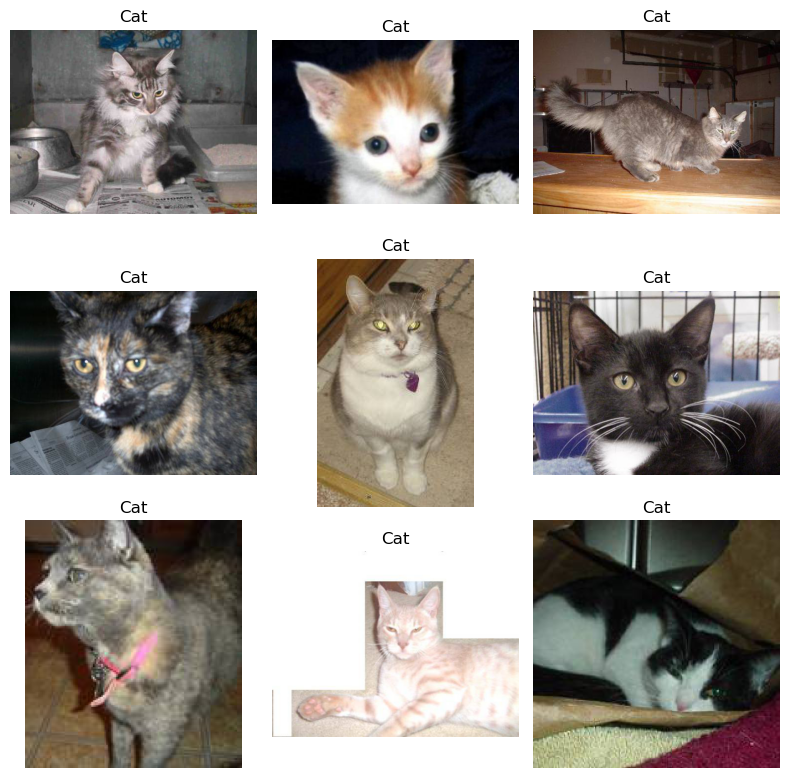

In [13]:
cat_path_dir = 'C:\\Users\\anant\\deep learning\\Untitled Folder\\dogs_vs_cats\\train\\cats'
plot_image_from_dir(cat_path_dir , class_animal = 'Cat')

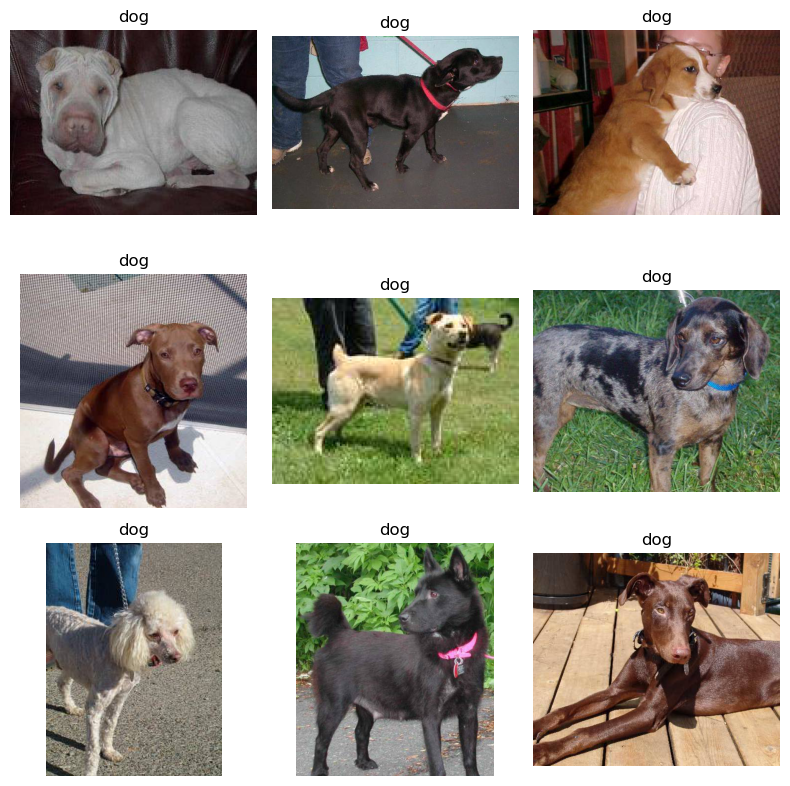

In [14]:
plot_image_from_dir(dog_path_dir , class_animal = 'dog')

In [15]:
cat_images = os.listdir(cat_path_dir)
dog_images = os.listdir(dog_path_dir)
count = [len(cat_images) , len(dog_images)]
print(count)

[10000, 10000]


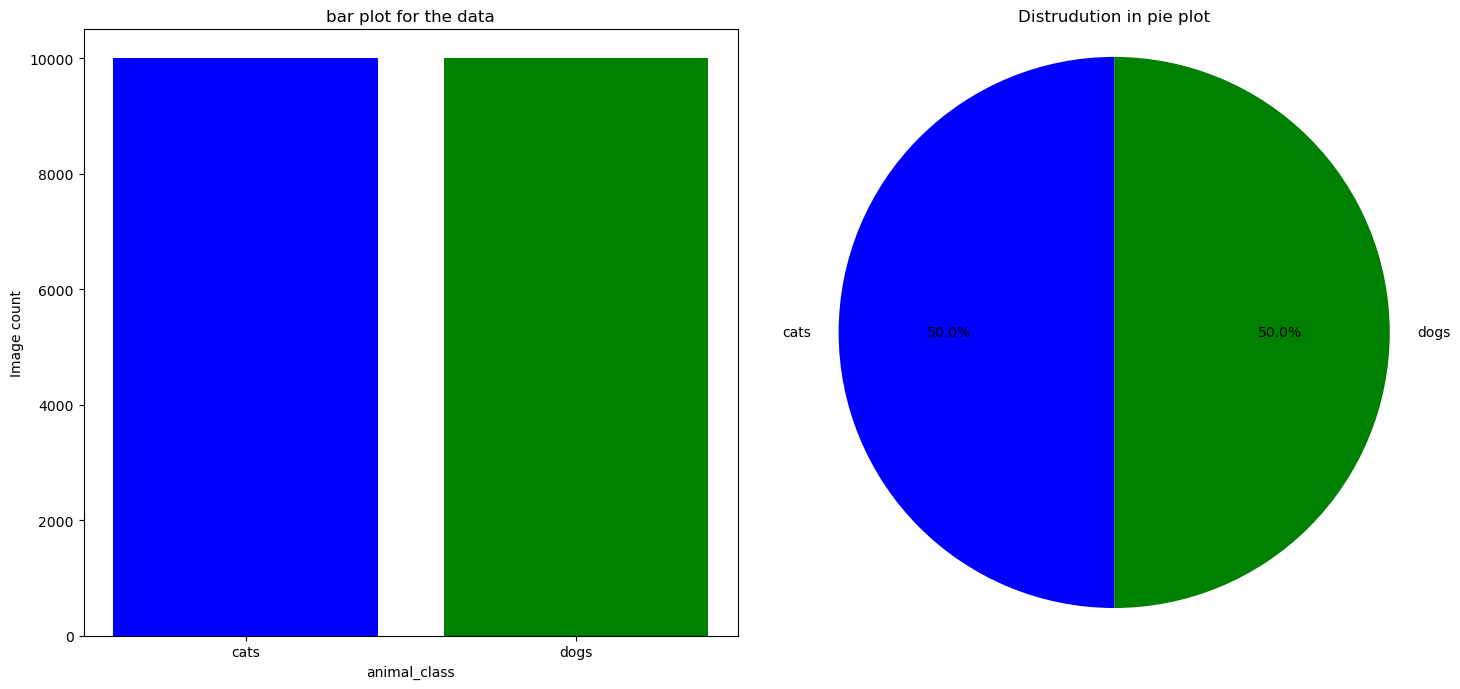

In [16]:
# creating a plot for data ananlysis 
class_animals = ['cats' , 'dogs']
fig , ax = plt.subplots(1 , 2 , figsize= (15 ,7))
ax[0].bar(class_animals , count , color = ['blue' , 'green'])
ax[0].set_xlabel('animal_class')
ax[0].set_ylabel('Image count')
ax[0].set_title('bar plot for the data')

ax[1].pie( count ,labels = class_animals ,  colors = ['blue', 'green']  , autopct = '%1.1f%%' , startangle = 90) 
ax[1].set_title('Distrudution in pie plot')
ax[1].axis('equal')

plt.tight_layout()
plt.show()

In [18]:
import os
import cv2
import imghdr

image_exts = ['jpeg', 'jpg', 'png']
data_dir = '/content/dogs_vs_cats'

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            file_type = imghdr.what(file_path)
            if file_type not in image_exts:
                print(f"Removing {file_path} (invalid type: {file_type})")
                os.remove(file_path)
            else:
                img = cv2.imread(file_path)
                if img is None:
                    print(f"Removing {file_path} (unable to read image)")
                    os.remove(file_path)
        except Exception as e:
            print(f"Removing {file_path} (exception: {e})")
            os.remove(file_path)


In [19]:
# using numpy and PIL Images to load the shape and channels 
def image_to_arr(image_path):
  try:
    with Image.open(image_path) as img :
      image_array = np.array(img)
      return image_array 
  except IOError :
    print(f"could not read the path of the image {image_path}")
    return None 

In [20]:
name = os.path.join(dog_path_dir , 'dog.1000.jpg')
image_to_arr(name)
# checking if the funtion is working 

array([[[  8,   9,   4],
        [ 10,  11,   6],
        [ 12,  14,  11],
        ...,
        [160, 162, 185],
        [159, 161, 184],
        [158, 160, 183]],

       [[ 15,  14,  10],
        [ 16,  15,  11],
        [ 17,  17,  15],
        ...,
        [157, 159, 182],
        [156, 158, 181],
        [155, 157, 180]],

       [[ 16,  13,   8],
        [ 17,  13,  10],
        [ 17,  16,  12],
        ...,
        [155, 157, 180],
        [154, 156, 179],
        [153, 155, 178]],

       ...,

       [[110,  95,  88],
        [111,  96,  89],
        [112,  97,  90],
        ...,
        [128, 112,  99],
        [128, 112,  99],
        [128, 112,  99]],

       [[110,  95,  88],
        [109,  94,  87],
        [110,  95,  88],
        ...,
        [129, 113, 100],
        [129, 113, 100],
        [129, 113, 100]],

       [[113,  98,  91],
        [110,  95,  88],
        [109,  94,  87],
        ...,
        [125, 109,  96],
        [125, 109,  96],
        [125, 109,  96]]

In [21]:
def img_to_array2(image):
   img = cv2.imread(image)
   if img is not None:
    print(img)
    print(imag.shape)
   else:
    print("cant be laoded plese check for the permission")

In [22]:
# loading the image with pil and printing it with np.array 
def img_to_array3(image):
  img_pil = Image.open(image)
  ima_arr = np.array(img_pil)
  print(ima_arr)
  print(ima_arr.shape ) 

In [25]:
base_dir = 'C:\\Users\\anant\\deep learning\\Untitled Folder\\dogs_vs_cats\\train'
train_datagen = ImageDataGenerator(rescale = 1./255 , validation_split = 0.2 )

In [26]:
train_generator = train_datagen.flow_from_directory(
    base_dir , 
    target_size = (150 , 150 ),
    batch_size = 20,
    class_mode = 'binary' ,
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir , 
    target_size = (150 , 150),
    batch_size = 20 ,
    class_mode = "binary" ,
    subset = 'validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [27]:
train_class_labels = train_generator.class_indices 
validation_class_labels = validation_generator.class_indices
print(train_class_labels)
print(validation_class_labels)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [28]:
image , labels = next(train_generator)
image , labels 

(array([[[[0.2784314 , 0.2627451 , 0.21568629],
          [0.2784314 , 0.2627451 , 0.21568629],
          [0.2784314 , 0.2627451 , 0.21568629],
          ...,
          [0.9333334 , 0.9490197 , 1.        ],
          [0.9490197 , 0.9921569 , 0.9294118 ],
          [0.9686275 , 0.96470594, 0.98823535]],
 
         [[0.2784314 , 0.2627451 , 0.21568629],
          [0.2784314 , 0.2627451 , 0.21568629],
          [0.2784314 , 0.2627451 , 0.21568629],
          ...,
          [0.92549026, 0.9568628 , 1.        ],
          [0.96470594, 0.97647065, 0.9490197 ],
          [0.96470594, 0.9607844 , 0.9843138 ]],
 
         [[0.2784314 , 0.2627451 , 0.21568629],
          [0.2784314 , 0.2627451 , 0.21568629],
          [0.2784314 , 0.2627451 , 0.21568629],
          ...,
          [0.9058824 , 0.9725491 , 1.        ],
          [0.9843138 , 0.9568628 , 0.9843138 ],
          [0.9607844 , 0.9568628 , 0.9803922 ]],
 
         ...,
 
         [[0.1764706 , 0.24313727, 0.27450982],
          [0.17254

In [29]:
import matplotlib.pyplot as plt

def plot_images_from_generator(generator, num_images=4):
    images, labels = next(generator)

    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()

    # Plot each image with its corresponding label
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.astype('uint8'))  # Ensure the image is in the correct format
        class_labels = dict((v, k) for k, v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [30]:
train_generator.reset()

In [31]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

C:\Users\anant\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [37]:
import numpy as np

batch = 20
train_steps = int(np.ceil(train_generator.samples / batch))
validation_steps = int(np.ceil(validation_generator.samples / batch))
print(train_steps, validation_steps)

800 200


In [40]:
history = model.fit(train_generator , steps_per_epoch = train_steps , epochs = 1 , validation_data = validation_generator , validation_steps = validation_steps )

800/800 ━━━━━━━━━━━━━━━━━━━━ 222s 277ms/step - accuracy: 0.7608 - loss: 0.4878 - val_accuracy: 0.7893 - val_loss: 0.4511


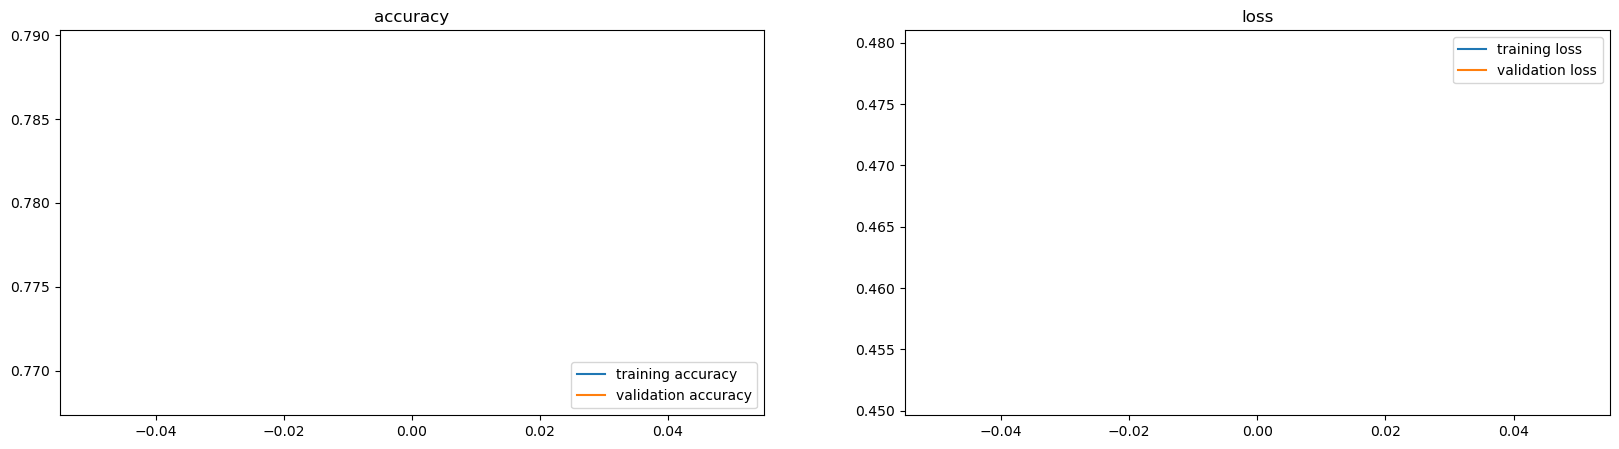

In [41]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize = (20 ,5))
plt.subplot(1 ,2, 1)
plt.plot(epochs_range , acc , label = 'training accuracy')
plt.plot(epochs_range , val_acc , label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.title('accuracy')

plt.subplot(1 , 2 , 2)
plt.plot(epochs_range , loss , label = 'training loss')
plt.plot(epochs_range , val_loss , label = 'validation loss')
plt.legend(loc ='upper right')
plt.title('loss')
plt.show()

In [43]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_dir = 'C:\\Users\\anant\\deep learning\\Untitled Folder\\dogs_vs_cats\\test'
test_generator = test_datagen.flow_from_directory(
    test_dir ,
    target_size = (150 , 150 ),
    batch_size = 20 ,
    class_mode = 'binary' ,
    shuffle = False
)

Found 5000 images belonging to 2 classes.


In [44]:
step = int(np.ceil(test_generator.samples/test_generator.batch_size))

In [45]:
probabilities = model.predict(test_generator , steps = step )
probabilities

250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 337ms/step


array([[0.04030505],
       [0.1403404 ],
       [0.05576052],
       ...,
       [0.85173976],
       [0.53447175],
       [0.5446741 ]], dtype=float32)

In [46]:
test_generator.reset()
true_classes = test_generator.classes
step = int(np.ceil(test_generator.samples/test_generator.batch_size))
probabilities = model.predict(test_generator , steps = step )
predicted_classes = (probabilities > 0.5).astype(int).squeeze()
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step


array([0, 0, 0, ..., 1, 1, 1])

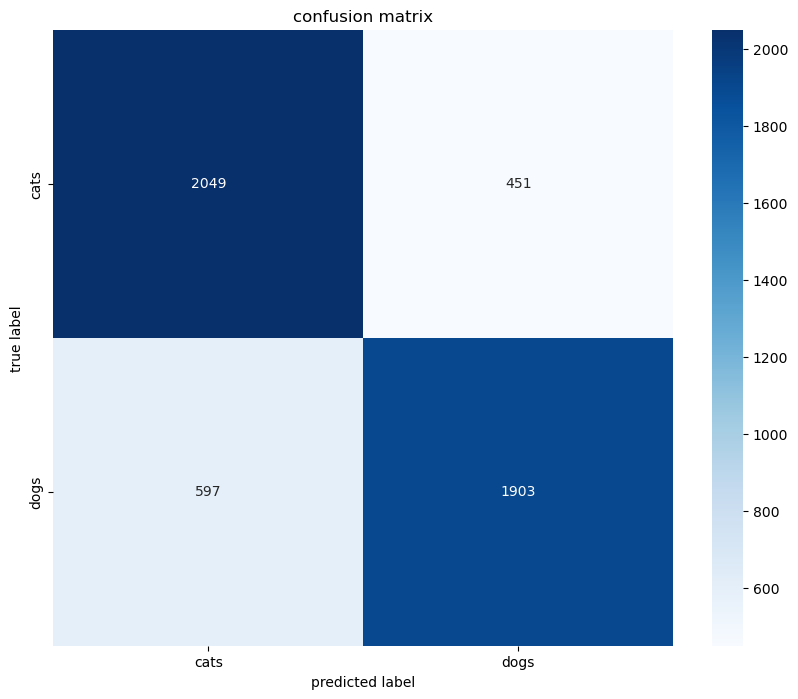

In [47]:
cm = confusion_matrix(true_classes , predicted_classes )

plt.figure(figsize =(10 ,8 ))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = 'Blues' , xticklabels = class_labels , yticklabels = class_labels)
plt.title('confusion matrix')
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()

In [48]:
loss , accuracy = model.evaluate(test_generator)
print(loss , accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8146 - loss: 0.4198
0.4490715265274048 0.7904000282287598


In [49]:
def make_prediction(img_path):
  img = load_img(img_path , target_size = (150 , 150 ))
  img_array = img_to_arr(img)
  img_array = np.expand_dims(img_array , axis = 0)
  img_array /= 255.

  prediction = model.predict(img_array)
  print(prediction)

  plt.subplot(1 ,2 ,1)
  plt.imshow(img)
  plt.title('original Image')
  plt.axis('off')

  plt.subplot(1 ,2 ,2)
  if(prediction[0][0] > 0.5) :
    plt.title('predicted: Dog')
  else:
    plt.title('Predicted: cat')
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [50]:
# misclassification
test_generator.reset()
prediction = model.predict(test_generator , verbose = 1 )

predicted_classes = (prediction > 0.5).astype(int).reshape(-1 )
true_classes  = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_counts = len(misclassified_indices)
print( misclassified_counts  , misclassified_indices)

250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step
1048 [   8   17   21 ... 4981 4995 4996]


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step
1048


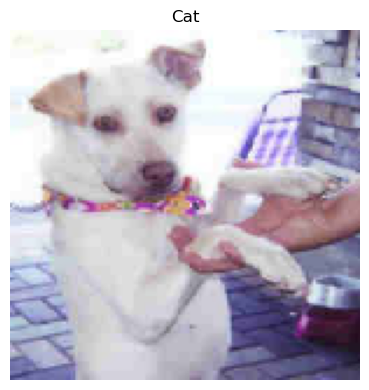

In [51]:
predictions= model.predict(test_generator)
predicted_classes = prediction > 0.5
true_classes = test_generator.classes
filenames = test_generator.filenames
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(len(misclassified_indices))

num_sample_dis = 4
random_indices = random.sample(list(misclassified_indices) , num_sample_dis)

plt.figure(figsize = (10 , 10))
for i , index in enumerate(random_indices ,1):
  img_path = test_dir +'/' + filenames[index]
  img = load_img(img_path , target_size = (150 , 150))
  predicted_class = "DOg" if predicted_classes[index] else "Cat"

  plt.subplot(2 ,2 , 1)
  plt.imshow(img)
  plt.title(predicted_class)
  plt.axis("off")
plt.show()
